In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [2]:
df = pd.read_csv('train.csv')
dataset = pd.read_csv('gender_submission.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [9]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables are  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


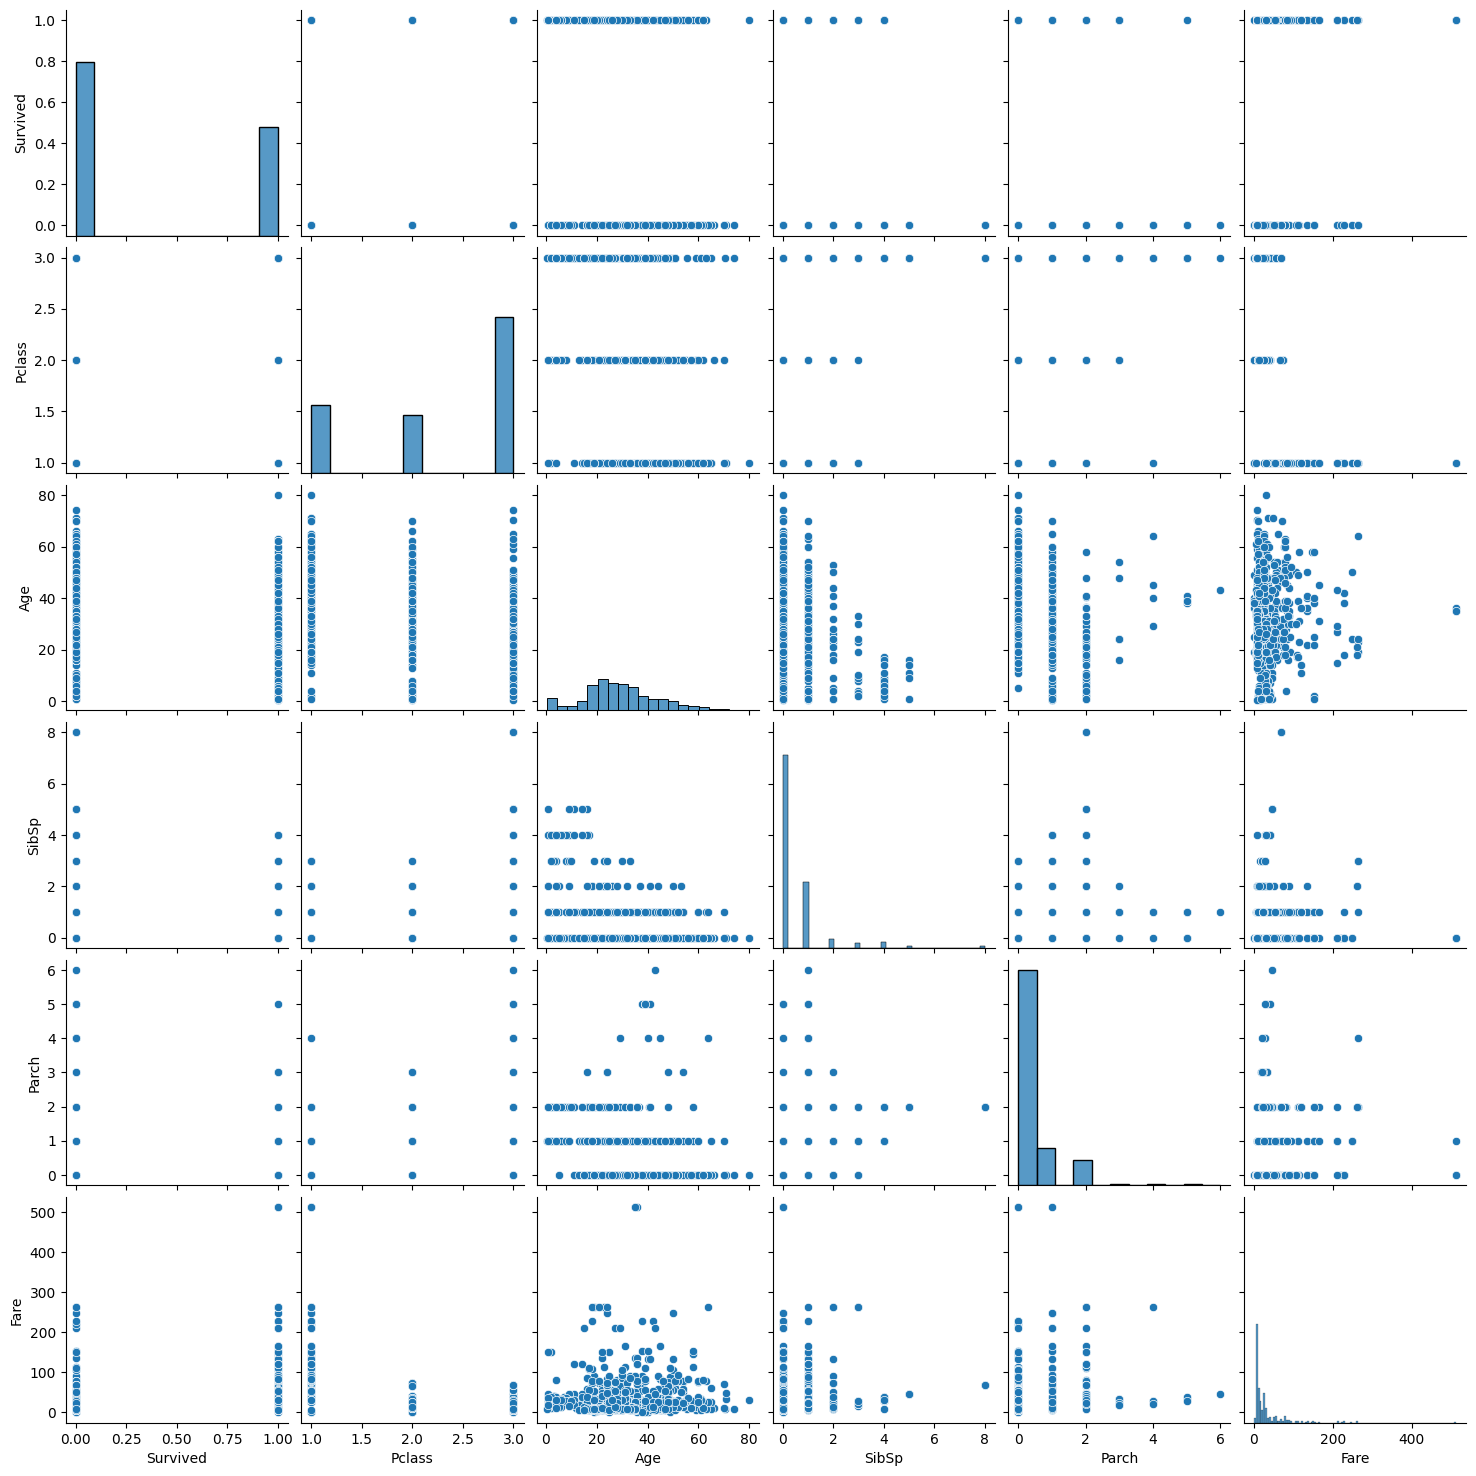

In [10]:
sns.pairplot(df)
plt.show()

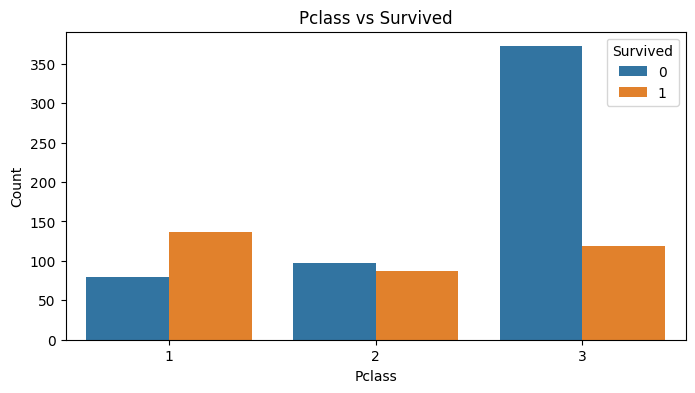

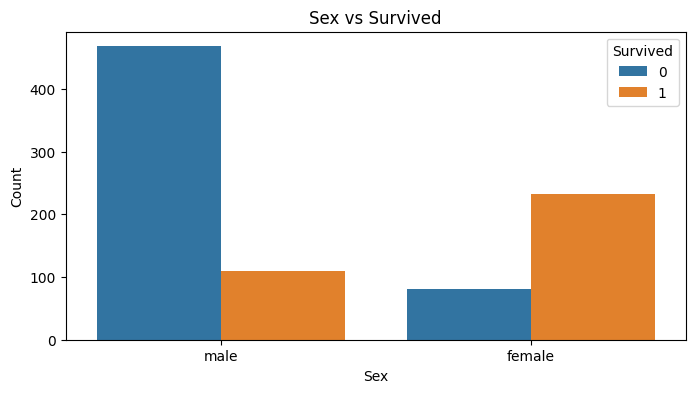

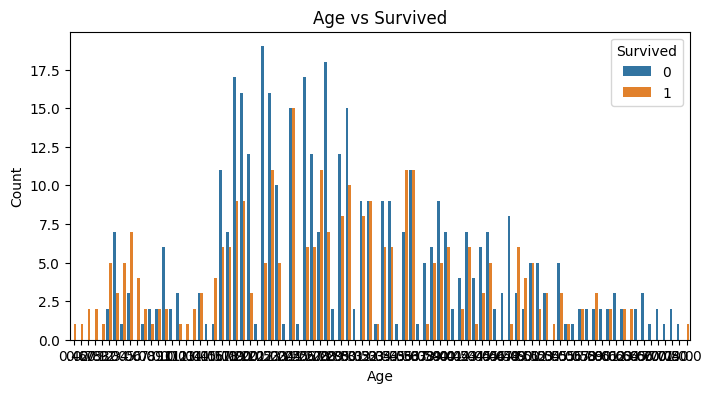

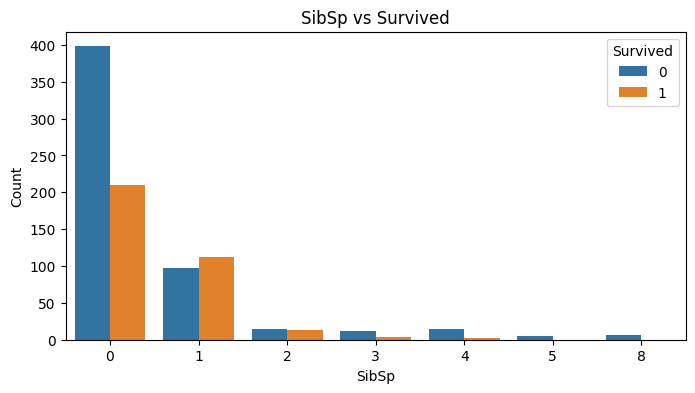

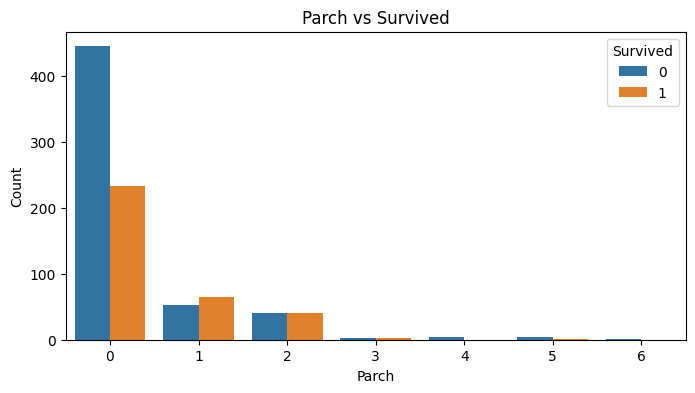

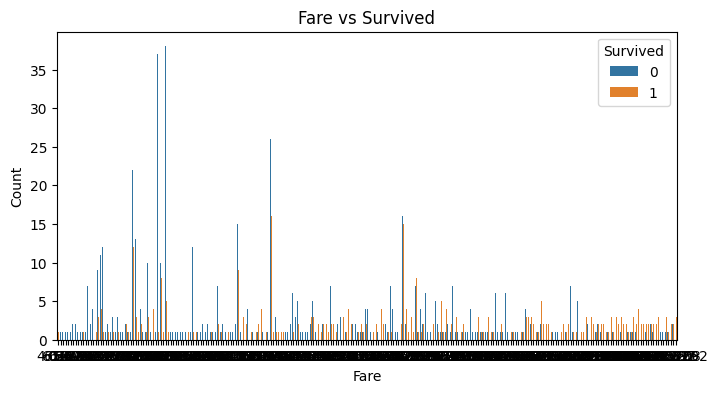

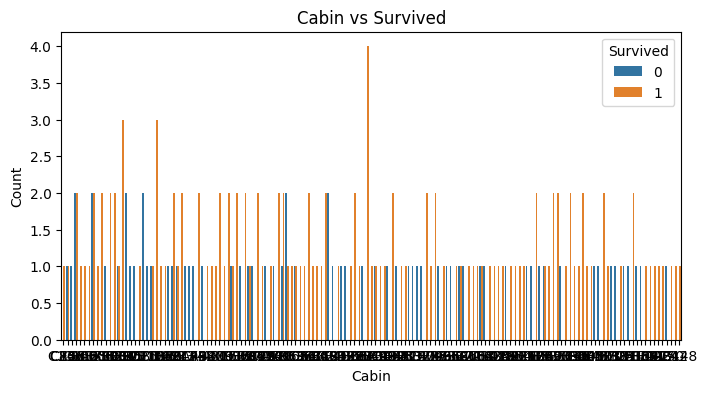

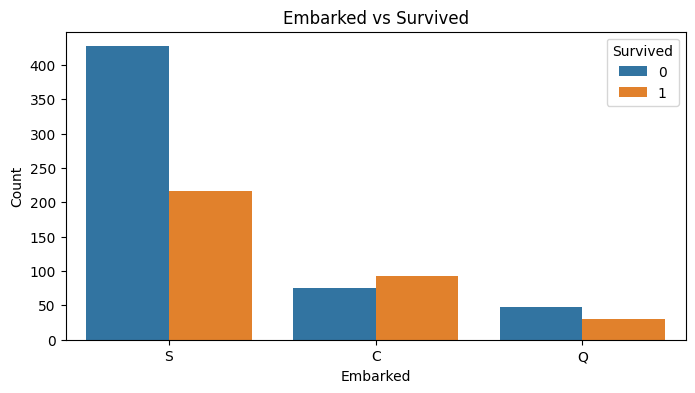

In [11]:
for col in df.columns:
    if col != "Survived":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="Survived", data=df)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs Survived")
        plt.show()


<h3>Observations:</h3>
Most 1st class people survived while 3rd class people died</br>
Most male died while most females survived</br>
Those having 1 sibiling or spouse has more chance of surviving</br>
Those having 1 parent or child has more chance of surviving</br>
Those who embarked from Cherbourg has great chance of survining</br>

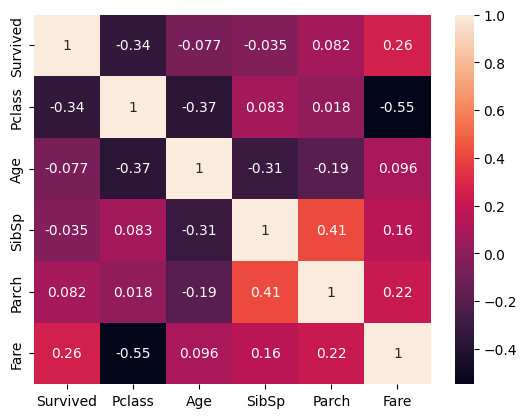

In [12]:
df1=df.select_dtypes(exclude=['object'])
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [13]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df = df.drop(['Cabin','Embarked'],axis=1) 
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [15]:
def impute_nan_median(df,column,median):
    df[column+'_median'] = df[column].fillna(median)
    return df

median_val = df.Age.median()
df = impute_nan_median(df,'Age',median_val)
df[df.Age.isna()][['Age','Age_median']]

,Age,Age_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


In [16]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()

Survived


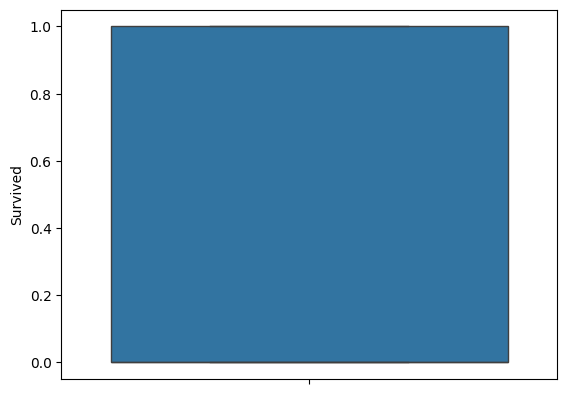

Pclass


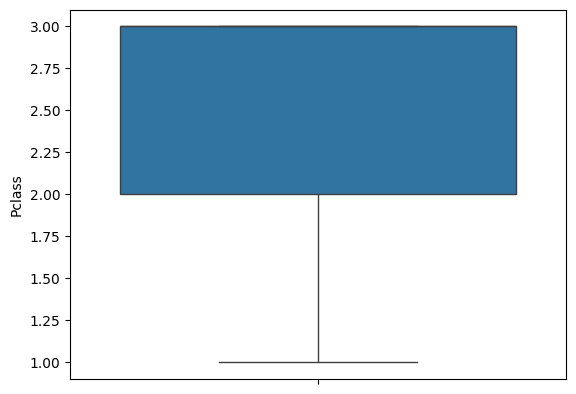

Age


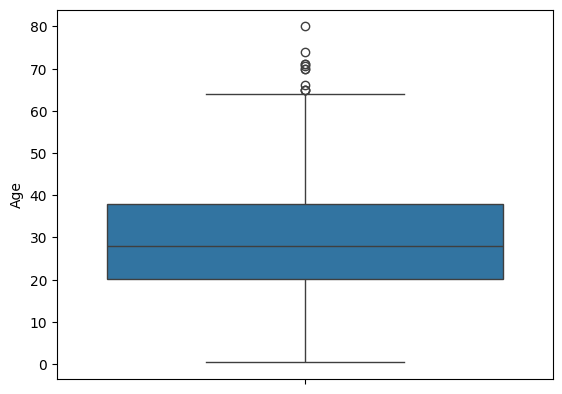

SibSp


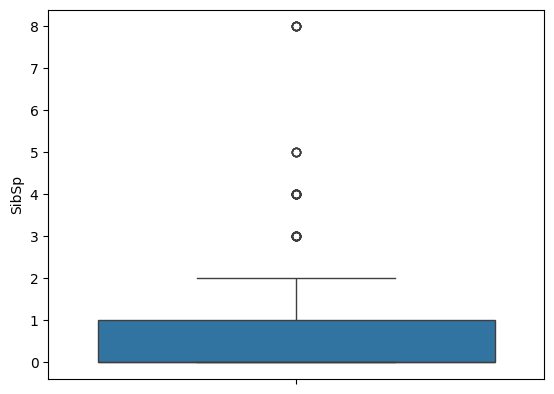

Parch


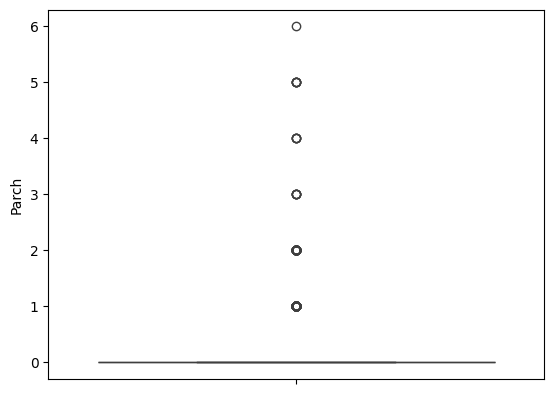

Fare


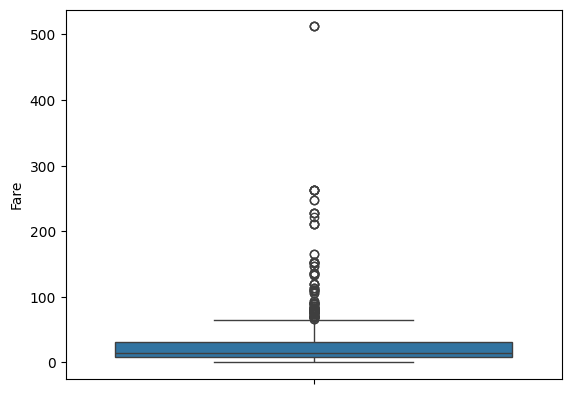

Age_median


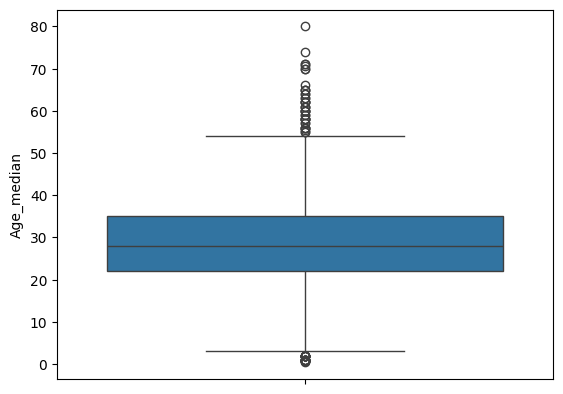

In [17]:
for col in num_cols:
    print(col)
    sns.boxplot(df[col])
    plt.show()

In [18]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

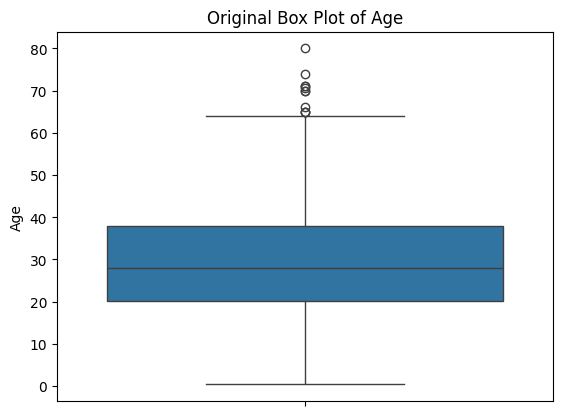

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_median
0,0,3,male,22.0,1,0,7.2500,22.0
1,1,1,female,38.0,1,0,71.2833,38.0
2,1,3,female,26.0,0,0,7.9250,26.0
3,1,1,female,35.0,1,0,53.1000,35.0
4,0,3,male,35.0,0,0,8.0500,35.0
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,39.0
886,0,2,male,27.0,0,0,13.0000,27.0
887,1,1,female,19.0,0,0,30.0000,19.0
889,1,1,male,26.0,0,0,30.0000,26.0


In [19]:
df=removal_box_plot(df, 'Age', 53)
df

In [20]:
labelEncoder = LabelEncoder()

In [21]:
df['Sex Encoded'] = labelEncoder.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_median,Sex Encoded
0,0,3,male,22.0,1,0,7.2500,22.0,1
1,1,1,female,38.0,1,0,71.2833,38.0,0
2,1,3,female,26.0,0,0,7.9250,26.0,0
3,1,1,female,35.0,1,0,53.1000,35.0,0
4,0,3,male,35.0,0,0,8.0500,35.0,1


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     664 non-null    int64  
 1   Pclass       664 non-null    int64  
 2   Sex          664 non-null    object 
 3   Age          664 non-null    float64
 4   SibSp        664 non-null    int64  
 5   Parch        664 non-null    int64  
 6   Fare         664 non-null    float64
 7   Age_median   664 non-null    float64
 8   Sex Encoded  664 non-null    int32  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 49.3+ KB


In [23]:
y_train = df['Survived']
x_train = df.drop(columns=['Survived', 'Sex'])

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [25]:
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

lasso = Lasso(random_state=42)
ridge = Ridge(random_state=42)

scoring = make_scorer(precision_score, zero_division=1)

lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

lasso_grid_search.fit(x_train, y_train)
ridge_grid_search.fit(x_train, y_train)

print("Lasso Grid Search best params:", lasso_grid_search.best_params_)
print("Ridge Grid Search best params:", ridge_grid_search.best_params_)

best_lasso = lasso_grid_search.best_estimator_
best_ridge = ridge_grid_search.best_estimator_

Lasso Grid Search best params: {'alpha': 0.01}
Ridge Grid Search best params: {'alpha': 10.0}


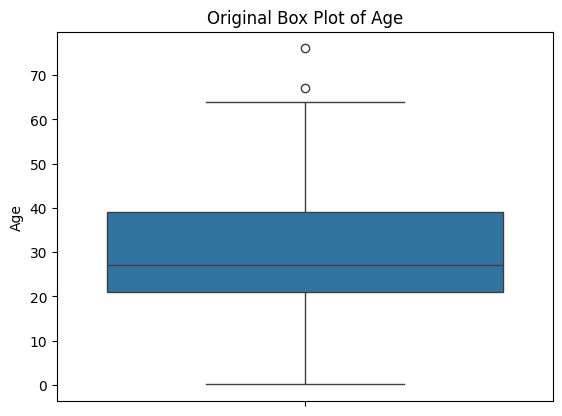

In [26]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Cabin','Embarked'],axis=1) 
median_val_test = df_test.Age.median()
df_test = impute_nan_median(df_test,'Age',median_val_test)
df_test=removal_box_plot(df_test, 'Age', 53)
df_test['Sex Encoded'] = labelEncoder.fit_transform(df_test['Sex'])

In [27]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Age_median     0
Sex Encoded    0
dtype: int64

In [28]:
df_temp = pd.read_csv('gender_submission.csv')
merged_df = df_test.merge(df_temp[['PassengerId', 'Survived']], on='PassengerId', how='left')
y_test = merged_df['Survived']
df_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
y_test.head()

0    0
1    1
2    0
3    1
4    0
Name: Survived, dtype: int64

In [29]:
x_test = df_test
x_test.drop(columns=['Sex'],axis=1,inplace=True)
x_test.isna().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Age_median     0
Sex Encoded    0
dtype: int64

In [30]:
x_test= scaler.fit_transform(x_test)


In [31]:
y_pred_best_lasso = best_lasso.predict(x_test)
y_pred_best_ridge = best_ridge.predict(x_test)

y_pred_best_lasso_binary = (y_pred_best_lasso >= 0.5).astype(int)
y_pred_best_ridge_binary = (y_pred_best_ridge >= 0.5).astype(int)

precision_best_lasso = precision_score(y_test, y_pred_best_lasso_binary)
recall_best_lasso = recall_score(y_test, y_pred_best_lasso_binary)

precision_best_ridge = precision_score(y_test, y_pred_best_ridge_binary)
recall_best_ridge = recall_score(y_test, y_pred_best_ridge_binary)

print(f"Best Lasso - Alpha: {best_lasso.alpha}, Precision: {precision_best_lasso}, Recall: {recall_best_lasso}")
print(f"Best Ridge - Alpha: {best_ridge.alpha}, Precision: {precision_best_ridge}, Recall: {recall_best_ridge}")


Best Lasso - Alpha: 0.01, Precision: 0.9469026548672567, Recall: 0.9385964912280702
Best Ridge - Alpha: 10.0, Precision: 0.918918918918919, Recall: 0.8947368421052632
